In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats
import analysis_perDRG_F1_MA #my file with DRG means
import scikit_posthocs as sp
from sklearn.linear_model import LinearRegression

In [2]:
name = "D7_CCI_"
#open json file with data lists from all images
with open ("F1_CCI_d7.json") as f:
    results_d7cci = json.load (f)

In [3]:
#implement / access file for mean calculations --> groups of IL and CL side
d7cci_il = analysis_perDRG_F1_3.GroupData (results_d7cci, "IL" , anz_rats = 6)
d7cci_cl = analysis_perDRG_F1_3.GroupData (results_d7cci, "CL" , anz_rats = 6)

coefficient of determination: 0.0024333794609850967
intercept: 1.5948296275463523
slope: [0.02093034]


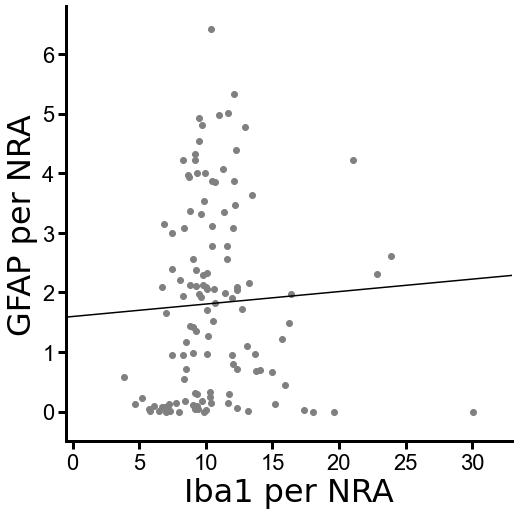

In [43]:
x = getattr (d7cci_il, "iba1_per_nra_all_allrats")
y = getattr (d7cci_il, "gfap_per_nra_all_allrats")
fig = plt.figure (figsize = (8,8))

#scatterplot
plt.scatter (x , y, color = "gray")

#formating of the scatter plot 
ax = plt.gca ()
ax.set_xlabel('Iba1 per NRA', fontsize = 32)
ax.set_ylabel('GFAP per NRA', fontsize = 32)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(length=8, width=3)

plt.xticks (fontname = "arial" , fontsize = 22)
plt.yticks (fontname = "arial" , fontsize = 22)
ax.set_ylim ([-0.5 , 6.8])
ax.set_xlim ([-0.5 , 33 ])

#regression line - get values
x= np.array(x).reshape((-1, 1))
model = LinearRegression()
model.fit (x, y)
r_sq = model.score(x, y)
b = float(model.intercept_)
a = float (model.coef_)
x_lin = np.linspace(-0.5, 33 ,100)
y_lin = a*x_lin+b
#plot regression 
plt.plot (x_lin, y_lin, "k")

plt.savefig (r"C:\Users\fesi9\OneDrive\Dokumente\Uni\Master\1-Masterarbeit\3-Ergebnisse\1-Bildauswertung\Auswertung_F1\Scatterplot Iba1 vs GFAP in NRA")

In [9]:
def statistic (groupdata_il , groupdata_cl):
    #test for normal distribution 
    statistic, p_value_il = stats.shapiro(groupdata_il)
    statistic, p_value_cl = stats.shapiro(groupdata_cl)
    
    if (p_value_il < 0.05) or (p_value_cl < 0.05):
        #no normal distribution
        #--> Mann Whitney U test  
        statistic, p_value = stats.mannwhitneyu(groupdata_il, groupdata_cl, alternative='two-sided') 
        print('Mann Whitney U: p-value='+"{:.5f}".format(p_value))
    else: #normal distribution --> test variance
        statistic, p_value = stats.bartlett (groupdata_il, groupdata_cl)
        if p_value < 0.05:
            # no equal variance
            equal_variance = False
            print('Welch-test')
        else: 
            equal_variance = True
            print('t-test')
        # perform t-test
        statistic, p_value = stats.ttest_ind(groupdata_il, groupdata_cl, equal_var=equal_variance, nan_policy='omit')
        print('p-value='+"{:.5f}".format(p_value))

In [63]:
def plot_all(feature_a, ylabel, c1 , c2):
    #c1 and c2 indicate the range of the color palette
    group_il_data_a = getattr (d7cci_il, feature_a)
    group_cl_data_a = getattr (d7cci_cl, feature_a)         
    
    #statistic analysis for features plotted
    statistic (group_il_data_a, group_cl_data_a)
    
    #layout of plot
    plt.figure(figsize=(6,6))
    labels=['CCI CL', 'CCI IL'] #x-labels
    c = sns.color_palette("tab20") #sets color palette
    col ='k' #box color black
    alpha=1
    standard_props = {"color":col, "alpha":alpha, "linewidth":3}
    markers= ['D','o']
    line_props = standard_props
    bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':col} 
    median_props = standard_props
    cap_props = standard_props
    linewidth = 3
    fontsize = 18
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(length=8, width=linewidth)
    plt.xticks(fontname="Arial", fontsize=fontsize)
    plt.yticks(fontname="Arial", fontsize=fontsize)
    plt.ylabel(ylabel, fontname="Arial", fontsize= 24)

    #plot data
    sns.boxplot(data=[group_cl_data_a, group_il_data_a], width=0.3, whiskerprops=line_props, boxprops=bbox_props
                ,capprops=cap_props, medianprops=median_props, fliersize=0)
    sns.stripplot(data=[group_cl_data_a, group_il_data_a], jitter=0.1, dodge=True, size=7, marker='o', palette = c[c1 :c2])
    ax.set_xticklabels(labels, fontname="Arial", fontsize = fontsize)
    
    plt.savefig(name+ylabel+'.png', bbox_inches = "tight")
    plt.show()

Welch-test
p-value=0.00047


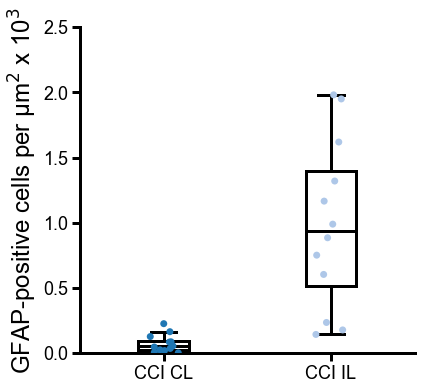

In [61]:
plot_all ("gfap_anz_per_nra_allrats", "GFAP-positive cells per µm$^2$ x 10$^3$", 0, 2)

In [7]:
plot_all ("iba1_anz_per_nra_allrats", "Iba1 positive cells per µm$^2$ x 10$^3$", 0,2)

NameError: name 'plot_all' is not defined

Mann Whitney U: p-value=0.00726


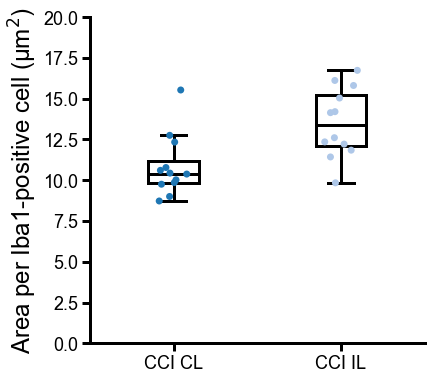

In [66]:
plot_all ("iba1_vol_per_anz_allrats", "Area per Iba1-positive cell (µm$^2$)", 0, 2)